# BCDP Field Map Data  
    
Create all the data files required for a map of BCDP Field Team Areas and Boulder County Election Districts 
- This notebook reads input files from various soures
- Transforms the input data to the columns and formats required for a Leaflet map
- Removes districts outside of Boulder County
- Saves files in file formats ready to be used directly in an online map
    - GeoJSON output files for Leaflet
    - KML files for Google Maps
- Started: August 10, 2022
- Updated:  


## Issues

### Plot bug - GeoPandas has plot error for some GeoDataFrames
- STATUS: workaround found, possibly fixed in latest GeoPandas
- WORKAROUND for plot() bug: 
    - to use .plot(), manually set aspect='equal' 
    - .plot(aspect='equal')

### GeoPandas has a bug writing GeoJSON files then reading them in. 
- STATUS: fixed
- Error description
    - Plotting the Boulder County SD's results in a hard error
        - Read statewide SD Shapefile
        - drop SD's outside Boulder County
        - sd_boulder.plot() works
        - write Boulder SD's to GeoJSON file 
        - .geojson then reading the .geojson
    - The bug results in a hard error when trying to plot the GeoDataFrame
- FIX:
    upgrade GeoPandas  and Numpy 1.21.1

### Problem with shape files from Redistricting Commission
- STATUS: fixed
- Error Description
    - Reading Redistricting Commission shape files then writing to geojson files, cannot be displayed in Leaflet
    - Redistricting Commission shape files are saved planar CRS
    - Leaflet requires WGS 84 CRS
- FIX: 
  - After reading shape file:
    - check crs
    - convert gpd crs to Leaflet compatible 4326
      - gpd.to_crs(4326)
      - ESPG:4326 (WGS 84 long/lat)

```
sds = gpd.read_file('data/sd/2021_Approved_Senate_Plan_w_Final_Adjustments.shp')
sd_boulder.to_file('data/sd_boulder.geojson', driver='GeoJSON')
sd_test_geojson = gpd.read_file('data/sd_boulder.geojson', driver='GeoJSON')

```


## Minimum Viable Product
- Government Districts in Boulder County
    - Boulder County
    - Boulder County Precincts
    - Congressional District
    - Colorado State Senate Districts
    - Colorado State House Districts
- BCDP Information
    - Field Team Areas
- Mapping software support
    - Leaflet.js GeoJSON files
    


## Potential Enhancements
- Field Team Coverage and Vacancies
    - Orphan Areas
    - Orphan Precincts
    - Single Precinct Organizer Vacancy
    - Mail precincts
- BCDP Field Team Member Data
    - AC Names
    - PCP Names
- BCDP Caucus SuperSite Boundaries (list of precincts)
- Support Google Maps with .kml files

## Input Files
- Boulder County boundary
    - data/County_Boundary.geojson
- SD Boundaries
    - Colorado SD boundary shape files defined by 2021 Redistricting Commission
        - 2021_Approved_Senate_Plan_w_Final_Adjustments.shp
    - Alternative - read in externally created KML files
        - Boulder County only - 3 SD's 
        - data/sd_boulder.kml
- HD Boundaries
    - Colorado HD boundary shape files defined by 2021 Redistricting Commission
- Boulder County Precincts
    - Boulder County Precincts defined by Boulder County Elections in 2022
        - geoJSON file directly downloaded from Boulder County Open Data
        - Final Approved 2022 precincts as of February 2022.
        - https://opendata-bouldercounty.hub.arcgis.com/datasets/bouldercounty::precincts/about
        - data/Precincts.geojson
- BCDP Field Team Areas (list of precincts in each Area)
    - Areas defined by list of precincts from BCDP Field Team
        - bcdp/field_map/data/Precinct-Area-ODB.csv
- CD Boundary
    - Colorado CD boundaries defined by 2021 Redistricting Commission

## Output Files
- GeoJSON files for Leaflet.js
    - Boulder CD boundary
    - Boulder SD boundaries
    - Boulder HD Boundaries
    - Bouldery County precinct boundaries
    - BCDP Field Team Areas
        - list of precincts
        - boundaries?
    - Statewide GeoJSON files
        - CD
        - SD
        - HD

In [1]:
import pandas as pd
import geopandas as gpd
import fiona

## Read Election District boundary files
- Boulder County boundary
- SD Boundaries
- HD Boundaries
- Boulder County Precincts
- CD Boundary

### County Boundary

In [2]:
county = gpd.read_file('data/county/County_Boundary.geojson')
county

,OBJECTID,Shapearea,Shapelen,geometry
0,1,2.066149e+10,729879.366363,"MULTIPOLYGON (((-105.23135 40.26221, -105.2333..."


### SD - State Senate District Boundaries

In [3]:
sds = gpd.read_file('data/sd/2021_Approved_Senate_Plan_w_Final_Adjustments/2021_Approved_Senate_Plan_w_Final_Adjustments.shp')

sds.head(5)

,OBJECTID,District,Shape_Leng,Shape_Area,geometry
0,1,1,3.080656e+06,3.564080e+11,"MULTIPOLYGON (((3207254.028 1930325.957, 32072..."
1,2,2,5.278787e+05,3.252466e+09,"POLYGON ((3199359.302 1631852.221, 3199775.126..."
2,3,3,1.099216e+06,6.685520e+10,"POLYGON ((3408101.036 1254173.307, 3408401.093..."
3,4,4,2.995556e+06,2.069199e+11,"POLYGON ((3093558.228 1654047.998, 3093814.205..."
4,5,5,3.619013e+06,2.167483e+11,"POLYGON ((2545420.289 1656281.505, 2545327.69 ..."


In [4]:
sds.crs

<Projected CRS: EPSG:2232>
Name: NAD83 / Colorado Central (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Colorado - counties Arapahoe; Chaffee; Cheyenne; Clear Creek; Delta; Denver; Douglas; Eagle; El Paso; Elbert; Fremont; Garfield; Gunnison; Jefferson; Kit Carson; Lake; Lincoln; Mesa; Park; Pitkin; Summit; Teller.
- bounds: (-109.06, 38.14, -102.04, 40.09)
Coordinate Operation:
- name: SPCS83 Colorado Central zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
# convert crs to WGS 84, ESPG:4326
sds.to_crs(4326, inplace=True)
sds.head()

,OBJECTID,District,Shape_Leng,Shape_Area,geometry
0,1,1,3.080656e+06,3.564080e+11,"MULTIPOLYGON (((-104.75617 40.38519, -104.7560..."
1,2,2,5.278787e+05,3.252466e+09,"POLYGON ((-104.79284 39.56609, -104.79137 39.5..."
2,3,3,1.099216e+06,6.685520e+10,"POLYGON ((-104.07353 38.52244, -104.07249 38.5..."
3,4,4,2.995556e+06,2.069199e+11,"POLYGON ((-105.16784 39.62869, -105.16694 39.6..."
4,5,5,3.619013e+06,2.167483e+11,"POLYGON ((-107.11386 39.6242, -107.11369 39.60..."


In [6]:
sds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    35 non-null     int64   
 1   District    35 non-null     int64   
 2   Shape_Leng  35 non-null     float64 
 3   Shape_Area  35 non-null     float64 
 4   geometry    35 non-null     geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 1.5 KB


In [7]:
sds.drop(columns=['OBJECTID', 'Shape_Leng', 'Shape_Area'], inplace=True)

In [8]:
sds.rename(columns={'District': 'SD'}, inplace=True)

In [9]:
# write all SD's to geojson for statewide maps
sds.to_file('output/sd.geojson', driver='GeoJSON')
# sds_test_geojson = gpd.read_file('data/sd.geojson', driver='GeoJSON')
# sds_test_geojson.plot()

In [10]:
boulder_sds = [15, 17, 18]
sd_boulder = sds[sds.SD.isin(boulder_sds)]

In [11]:
sd_boulder

,SD,geometry
14,15,"POLYGON ((-105.23149 40.99842, -105.22664 40.9..."
16,17,"POLYGON ((-105.12137 40.21042, -105.11564 40.2..."
17,18,"POLYGON ((-105.15947 40.11596, -105.15947 40.1..."


In [12]:
sd_boulder.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
# write Boulder County SD's to geojson file
sd_boulder.to_file('output/sd_boulder.geojson', driver='GeoJSON')

In [14]:
sd_boulder_test_geojson = gpd.read_file('output/sd_boulder.geojson', driver='GeoJSON')

/Users/brucenorikane/miniconda3/envs/geojupy/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


In [15]:
sd_boulder_test_geojson

,SD,geometry
0,15,"POLYGON ((-105.23149 40.99842, -105.22664 40.9..."
1,17,"POLYGON ((-105.12137 40.21042, -105.11564 40.2..."
2,18,"POLYGON ((-105.15947 40.11596, -105.15947 40.1..."


### HD - State House District Boundaries

In [16]:
hds = gpd.read_file('data/hd/2021_Final_Approved_House_Plan.shp')
hds.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
hds = hds[['DISTRICT','geometry']]
hds

,DISTRICT,geometry
0,1,"POLYGON ((-105.05324 39.69679, -105.05324 39.6..."
1,2,"POLYGON ((-104.94069 39.71108, -104.94074 39.7..."
2,3,"POLYGON ((-105.03494 39.62621, -105.03489 39.6..."
3,4,"POLYGON ((-105.02515 39.78439, -105.02509 39.7..."
4,5,"POLYGON ((-104.98053 39.76229, -104.98077 39.7..."
...,...,...
60,61,"POLYGON ((-104.70489 39.60946, -104.69906 39.6..."
61,62,"POLYGON ((-106.67838 37.4036, -106.684 37.4037..."
62,63,"POLYGON ((-102.05147 40.44001, -102.05154 40.4..."
63,64,"POLYGON ((-105.05519 40.22457, -105.05518 40.2..."


In [18]:
hds.rename(columns={'DISTRICT': 'HD'}, inplace=True)

In [19]:
hds

,HD,geometry
0,1,"POLYGON ((-105.05324 39.69679, -105.05324 39.6..."
1,2,"POLYGON ((-104.94069 39.71108, -104.94074 39.7..."
2,3,"POLYGON ((-105.03494 39.62621, -105.03489 39.6..."
3,4,"POLYGON ((-105.02515 39.78439, -105.02509 39.7..."
4,5,"POLYGON ((-104.98053 39.76229, -104.98077 39.7..."
...,...,...
60,61,"POLYGON ((-104.70489 39.60946, -104.69906 39.6..."
61,62,"POLYGON ((-106.67838 37.4036, -106.684 37.4037..."
62,63,"POLYGON ((-102.05147 40.44001, -102.05154 40.4..."
63,64,"POLYGON ((-105.05519 40.22457, -105.05518 40.2..."


In [20]:
hds.to_file('data/hd.geojson', driver='GeoJSON')

In [21]:
boulder_hds = [10, 11, 12, 19, 49]
hd_boulder = hds[hds.HD.isin(boulder_hds)]
hd_boulder


,HD,geometry
9,10,"POLYGON ((-105.23552 40.04903, -105.23601 40.0..."
10,11,"POLYGON ((-105.17158 40.13063, -105.17342 40.1..."
11,12,"POLYGON ((-105.21602 40.06186, -105.21556 40.0..."
18,19,"POLYGON ((-105.10304 40.03661, -105.10275 40.0..."
48,49,"POLYGON ((-105.70079 39.87893, -105.70078 39.8..."


In [22]:
hd_boulder.to_file('data/hd_boulder.geojson', driver='GeoJSON')


In [23]:
# hd_test_geojson = gpd.read_file('data/hd_boulder.geojson', driver='GeoJSON')
# hd_test_geojson.plot()

In [24]:
# m = hd_boulder.explore()
# m.save('hd_boulder.html')

### CD - Boulder County Congressional Districts
- All of Boulder County is in CD2

In [25]:
# Create CD2 boundary file from Final Approved CD shape file
CD_all = gpd.read_file('data/cd/2021_Approved_Congressional_Plan_with_Final_Adjustments/2021_Approved_Congressional_Plan_w_Final_Adjustments.shp')

In [26]:
CD_all.crs

<Projected CRS: EPSG:2232>
Name: NAD83 / Colorado Central (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Colorado - counties Arapahoe; Chaffee; Cheyenne; Clear Creek; Delta; Denver; Douglas; Eagle; El Paso; Elbert; Fremont; Garfield; Gunnison; Jefferson; Kit Carson; Lake; Lincoln; Mesa; Park; Pitkin; Summit; Teller.
- bounds: (-109.06, 38.14, -102.04, 40.09)
Coordinate Operation:
- name: SPCS83 Colorado Central zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [27]:
CD_all.to_crs(4326, inplace=True)

In [28]:
CD_all.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    8 non-null      int64   
 1   District    8 non-null      int64   
 2   Shape_Leng  8 non-null      float64 
 3   Shape_Le_1  8 non-null      float64 
 4   Shape_Area  8 non-null      float64 
 5   geometry    8 non-null      geometry
dtypes: float64(3), geometry(1), int64(2)
memory usage: 516.0 bytes


In [29]:
CD_all.head()

,OBJECTID,District,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1,1,2.495876,7.814496e+05,4.336640e+09,"POLYGON ((-104.66853 39.9069, -104.65916 39.90..."
1,2,2,11.320395,3.521568e+06,3.218254e+11,"POLYGON ((-106.97869 41.00338, -106.97421 41.0..."
2,3,3,23.731473,7.604425e+06,1.396837e+12,"POLYGON ((-107.36708 41.00307, -107.36565 41.0..."
3,4,4,19.406221,6.234628e+06,9.005584e+11,"POLYGON ((-102.59825 41.00242, -102.58208 41.0..."
4,5,5,3.028264,9.616973e+05,4.109716e+10,"POLYGON ((-104.91224 39.12984, -104.9122 39.12..."


In [30]:
cd2 = CD_all.drop(index=[0,2,3,4,5,6,7])


<Axes: >

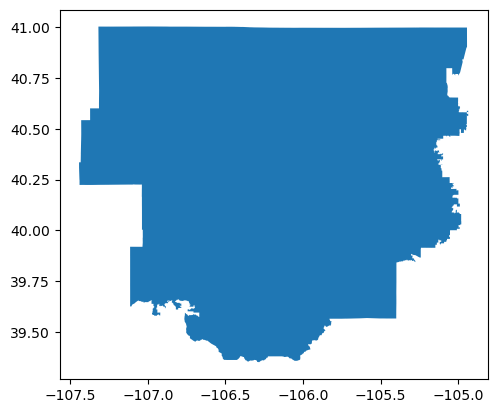

In [31]:
cd2.plot()

In [32]:
cd2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
cd2.to_file('output/cd2.geojson', driver='GeoJSON')

/Users/brucenorikane/miniconda3/envs/geojupy/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


<Axes: >

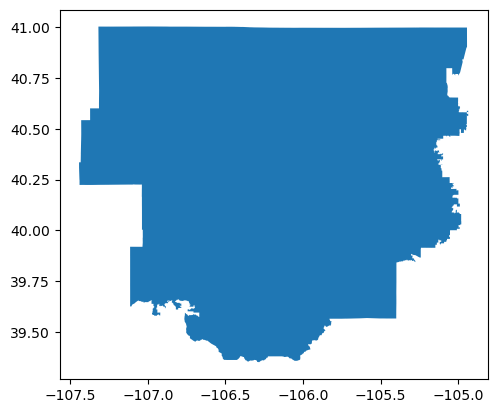

In [34]:
cd2_read_geojson = gpd.read_file('output/cd2.geojson', driver='GeoJSON')
cd2_read_geojson.plot()

### Precincts - Boulder County Precinct Boundaries

In [36]:
precincts = gpd.read_file('data/pct/precinct_map.shp')

In [37]:
precincts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
precincts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PCT        194 non-null    int64   
 1   Area       194 non-null    object  
 2   DISTRICT   194 non-null    object  
 3   SHAPEarea  194 non-null    float64 
 4   geometry   194 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 7.7+ KB


In [39]:
precincts.head(4)

,PCT,Area,DISTRICT,SHAPEarea,geometry
0,801,HD10-01,2181007801,1.765772e+07,"POLYGON ((-105.20685 40.07118, -105.20677 40.0..."
1,802,HD10-01,2181007802,2.016222e+08,"POLYGON ((-105.20846 40.08892, -105.20752 40.0..."
2,803,HD10-01,2181007803,8.826869e+06,"POLYGON ((-105.26511 40.0547, -105.26519 40.05..."
3,806,HD10-01,2181007806,1.043803e+07,"POLYGON ((-105.27273 40.05464, -105.27273 40.0..."


In [38]:
# precincts['pct'] = precincts.PRECINCT.str[-3:]

In [39]:
# precincts.set_index('pct', inplace=True)

In [ ]:
# precincts.head()

In [40]:
precincts = precincts[['DISTRICT','PCT','geometry']]
precincts.rename(columns={'DISTRICT':'precinct_name','PCT': 'precinct'}, inplace=True)

In [41]:
precincts.head(4)

,precinct_name,precinct,geometry
0,2181007801,801,"POLYGON ((-105.20685 40.07118, -105.20677 40.0..."
1,2181007802,802,"POLYGON ((-105.20846 40.08892, -105.20752 40.0..."
2,2181007803,803,"POLYGON ((-105.26511 40.0547, -105.26519 40.05..."
3,2181007806,806,"POLYGON ((-105.27273 40.05464, -105.27273 40.0..."


In [48]:
precincts = precincts.astype({'precinct':'str'}, copy=True)
precincts['precinct'] = precincts['precinct'].str.zfill(3)
# df['ID'] = df['ID'].str.zfill(15)
precinct_names = precincts.set_index('precinct_name')

precinct_names.head(4)

,precinct,geometry
precinct_name,,
2181007801,801,"POLYGON ((-105.20685 40.07118, -105.20677 40.0..."
2181007802,802,"POLYGON ((-105.20846 40.08892, -105.20752 40.0..."
2181007803,803,"POLYGON ((-105.26511 40.0547, -105.26519 40.05..."
2181007806,806,"POLYGON ((-105.27273 40.05464, -105.27273 40.0..."


In [49]:
precinct_names.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 194 entries, 2181007801 to 2154907914
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   precinct  194 non-null    object  
 1   geometry  194 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.5+ KB


In [52]:
precinct_names.sort_values('precinct').head()

,precinct,geometry
precinct_name,,
7171207001,001,"POLYGON ((-105.10969 39.95606, -105.10955 39.9..."
2151907002,002,"POLYGON ((-105.05519 40.19115, -105.05521 40.1..."
2184907003,003,"POLYGON ((-105.1692 39.9287, -105.1692 39.9286..."
2151207004,004,"POLYGON ((-105.18469 39.96263, -105.18468 39.9..."
2181207100,100,"POLYGON ((-105.15439 39.92921, -105.15227 39.9..."


In [46]:
precincts.to_file('output/pct_boulder.geojson', driver='GeoJSON')

## Create Field Team Area Boundary Files
- Read in Field Team Area-Precinct lists
- Create Area boundary files
- Save Area GeoJSON files

In [ ]:
pct_area = pd.read_csv('data/field/Precinct-Area-ODB-20220824.csv', dtype='str')
pct_area.drop(columns=['Area_oldStyle', 'Area_ODB'], inplace=True)
pct_area.info()

In [ ]:
pct_area.rename(columns={'Precinct_District': 'district', 'Precinct':'precinct'})

In [ ]:
pct_area.head()

In [49]:
pct_area.set_index('Precinct', inplace=True)

In [ ]:
pct_area.sort_index()

In [51]:
pct_area.to_csv('data/field/precincts_2022_09_12.csv')

### Add Area columns to precincts GeoDataFrame
- new columns
    - Area_Short
    - Area_Long

In [51]:
pcts = pd.concat([precincts, pct_area], axis=1)

In [52]:
pcts.drop(columns=['Precinct_District'], inplace=True)

### Check precinct data in merged dataframe
- Number of precincts = 193
- Number of Areas = 28
- Review Area_Short and Area_Long columns
- Check that index, DISTRICT and precinct columns agree
- Check # of precincts in each Area

In [ ]:
pcts.info()

In [ ]:
pcts.sort_index().head()

In [ ]:
pcts.sort_values('area_short')

In [ ]:
pcts.area_short.nunique()

In [ ]:
pcts.area_long.nunique()

In [ ]:
pcts.area_long.unique()

In [ ]:
areas = pcts.area_short.unique()
areas

In [ ]:
pcts.value_counts('area_short').sort_index()

### Export Precinct file with Area names

In [ ]:
pcts.to_file('output/pct_area_boulder.geojson', driver='GeoJSON')

### Create Area Boundaries
- use .dissolve() to aggregate precincts into Areas and return Area boundary geometry

In [64]:
area_groups = pcts.groupby('area_short')

In [ ]:
area_groups.groups

In [ ]:
# create GeoDataFrame using a single Area
# this sets all column names and data types correctly
area_gdf = gpd.GeoDataFrame(area_groups.get_group('BO-01').dissolve())
area_gdf

In [67]:
# Create boundary for each Area from outline of precincts in Area
for name, group in area_groups:
    area_gdf = pd.concat([area_gdf, group.dissolve()], ignore_index=True)   

In [ ]:
area_gdf.info()

In [ ]:
area_gdf

In [70]:
# Delete duplicate 1st row
area_gdf.drop(0, inplace=True)

In [ ]:
area_gdf = area_gdf[['area_short', 'area_long', 'geometry']]
area_gdf

In [ ]:
area_gdf.plot()

In [74]:
# area_gdf.explore()

In [ ]:
area_gdf.to_file('output/areas.geojson', driver='GeoJSON')

In [ ]:
area_test = gpd.read_file('output/areas.geojson', driver='GeoJSON')
area_test.info()

In [ ]:
area_test[area_test.area_short == 'LM-04'].plot()

## Transform data in dataframes

## Save transformed data in map format files